In [1]:
import numpy as np

In [2]:
"""
1d input x_i and x_j, alias to x and x' in the paper
for 2d input we should use np.meshgrid or np.mgrid
"""

num_input = 100

x_i = np.linspace(0.0, 1.0, num=num_input)
x_j = np.linspace(0.0, 1.0, num=num_input)

# x_i = np.random.uniform(size=num_input)
# x_j = np.random.uniform(size=num_input)

# display(x_i)
# display(x_j)


In [3]:
# take outer product of x_i and x_j to get 100 x 100 matrix
# in the paper sigma was defined entry-wise, but we want to compute the matrix at once
n_0 = 1
beta = 0.01

def calc_sigma_1(x_i, x_j):
    return np.outer(x_i, x_j) / n_0 + beta**2

# display(calc_sigma_1(x_i, x_j))

In [4]:
"""
f(x_i) and f(x_j) follow N(0, cov) where cov is a contatenation of 4 smaller matrices
"""

cov_ii = calc_sigma_1(x_i, x_i)
cov_ij = calc_sigma_1(x_i, x_j)
cov_ji = calc_sigma_1(x_j, x_i)
cov_jj = calc_sigma_1(x_j, x_j)

# cov_ij == cov_ji.T

In [5]:
# concatenate the 4 sigmas

v1 = np.vstack((cov_ii, cov_ji))
v2 = np.vstack((cov_ij, cov_jj))

cov = np.hstack((v1, v2))

display(cov.shape)
# cov == cov.T

(200, 200)

In [6]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

# is_pos_def(cov)

In [7]:
"""
gaol: approximate expectation using a finite sum and take the mean
now sample Y_i, Y_j from this distribution N(0, cov)
sample and compute outer product first, then take mean
"""
def calc_sigma_2(activation):
    mean = [0] * 2 * num_input
    num_samples = 1000
    sum_N = np.zeros((num_input, num_input))
    for i in range(num_samples):
        sample = np.random.multivariate_normal(mean, cov, size=1)[0]
        f_xi = sample[:num_input]
#         f_xj = sample[num_input:]
        prod = np.outer(activation(f_xi), activation(f_xi))
#         print(prod == prod.T)
        sum_N += np.outer(activation(f_xi), activation(f_xi))

    sigma_2 = (sum_N / num_samples) + beta**2
    
    return sigma_2

#     display(sigma_2)

In [8]:
"""
activation functions and their derivatives
"""

def relu_kth(x, k):
    return np.maximum(x**k, 0)

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return 1.0 * (x > 0)

def d_relu_kth(x, k):
    return k * x**(k-1) * (x > 0)

# display(relu(f_xi))
# display(d_relu(f_xi))


In [9]:
"""
Compute Theta 1 and 2 using Sigma
"""

THETA_1 = calc_sigma_1(x_i, x_j) # actually make a copy

sigma_2 = calc_sigma_2(relu)
sigma_2_prime = calc_sigma_2(d_relu)

THETA_2 = np.multiply(THETA_1, sigma_2_prime) + sigma_2

In [10]:
display(THETA_1.shape)
display(THETA_2.shape)

(100, 100)

(100, 100)

In [11]:
eigenvalues = np.linalg.eigvals(THETA_2)

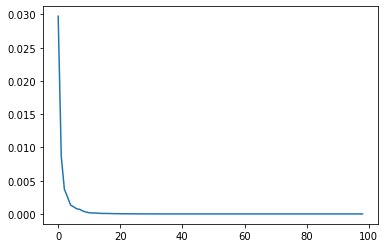

In [12]:
import matplotlib.pyplot as plt

plt.plot(eigenvalues[1:])

In [13]:
eigenvalues

array([3.33902780e+01, 2.97280542e-02, 8.62021354e-03, 3.70967685e-03,
       2.55664191e-03, 1.32521485e-03, 1.05757510e-03, 7.62470377e-04,
       6.77833878e-04, 4.21273595e-04, 2.82336623e-04, 1.70986045e-04,
       1.44207360e-04, 1.43041598e-04, 9.75794464e-05, 7.66936806e-05,
       6.93246768e-05, 6.67170058e-05, 5.14875312e-05, 3.79267501e-05,
       3.60104971e-05, 2.86219654e-05, 2.13356142e-05, 1.86081437e-05,
       1.51791187e-05, 1.46870381e-05, 1.36539496e-05, 1.04430404e-05,
       8.56341227e-06, 7.47873350e-06, 4.20099664e-06, 2.70933813e-06,
       1.54000322e-07, 3.31031317e-08, 1.61398701e-08, 6.17656350e-09,
       5.26798191e-09, 3.37923257e-09, 8.07913929e-10, 2.83961524e-10,
       2.69290513e-10, 1.73045634e-10, 1.28005418e-10, 1.23896886e-10,
       5.47264305e-11, 3.47532322e-11, 2.68474130e-11, 2.73108283e-11,
       9.39270664e-13, 6.91566048e-13, 6.02518209e-15, 5.39302981e-15,
       5.30287047e-15, 5.12513188e-15, 5.01350081e-15, 3.81911085e-16,
      

In [14]:
THETA_2 == THETA_2.T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
"""

"""